# Итоговый проект по программе "Специалист по Data Science"

## Тема: Определение вероятности покупки товара на основе данных о клиенте и его покупательской истории с помощью методов машинного обучения

**Цель проекта:** Продемонстрировать освоение ключевых методов анализа данных и их приминение на практике на основе задачи определения вероятности совершения покупки на основе данных о клиенте и его покупательской истории


**Задачи проекта:** 
1. Провести предобработку и исследовательский анализ данных полученного датасета
2. Составить портрет покупателя
3. Провести кластеризацию покупателей
4. Выбрать и обучить модель определения вероятности покупки товара


**Исходные данные:**
* Датасет ["Superstore Marketing Campaign Dataset"](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)

**Содержание отчета:**
* 1. Загрузка датасета и знакомство с данными
* 2. Предобработка данных
     * 2.1 Типы данных
     * 2.2 Пропуски данных
     * 2.3 Дубликаты данных
     * 2.4 Дообогащение данных
     * 2.5. Выводы по предобработке данных
* 3. Исследовательский анализ данных
* 4. Портрет покупателя
* 5. Кластеризация покупателей
* 6. Выбор и обучение модели для определения вероятности покупки товара
* 7. Общие выводы по результатам работы

## 1. Загрузка датасета и знакомство с данными

Задачи данного раздела:
* Импортировать необходимые библиотеки
* Загрузить датасет
* Ознакомиться с общей информацией о датасете

Импортируем необходимые библиотеки:

In [1]:
# Работа с данными
import pandas as pd

# Визуализация
import plotly.graph_objects as go

# Настройка отображения Jupiter
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # вывод результатов без сокращения количества столбцов

Загрузим датасет:

In [2]:
data = pd.read_csv('superstore_data.csv')

Откроем датасет и посмотрим на данные:

In [3]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


Посмотрим общую информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

В датасете содиржится меформация о 2240 клиентов с 22 признаками. К датасету прилагалось следующее описание:

* ``Id`` - уникальный идентификатор клиента
* ``Year_Birth`` - год рождения клиента
* ``Education`` - уровень образования клиента
* ``Marital_Status`` - семейное положение клиента
* ``Income`` - годовой доход домохозяйства клиента
* ``Kidhome`` - количество маленьких детей у клиента
* ``Teenhome`` - количество детей-подростков 
* ``Dt_Customer`` - дата регистрации клиента
* ``Recency`` - количество дней с последней покупки
* ``MntWines`` - сумма, потраченная на вино за последние два года
* ``MntFruits`` -  сумма, потраченная на фрукты за последние два года
* ``MntMeatProducts`` -  сумма, потраченная на мясо за последние два года
* ``MntFishProducts`` -  сумма, потраченная на рыбу за последние два года
* ``MntSweetProducts`` -  сумма, потраченная на сладости за последние два года
* ``MntGoldProds`` -  сумма, потраченная на "золотые продукты" за последние два года. "Золотые продукты" - это продукты, размещаемые на "золотой полке" — это полка, расположенная на уровне глаз покупателей, на высоте от 1,2 до 1,7 метра от пола (с учётом среднего роста взрослого человека). В детских магазинах золотая полка находится на уровне от 0,3 до 1 метра от пола. 
* ``NumDealsPurchases`` - количество покупок со скидкой
* ``NumWebPurchases`` - количество покупок совершенных на сайте компании
* ``NumCatalogPurchases`` - количество покупок, совершенных с помощью каталога (покупка товаров, которые должны быть отправлены по почте)
* ``NumStorePurchases`` - количество покупок совершенных непосредственно в магазине
* ``NumWebVisitsMonth`` - количество посещений сайта компании за последний месяц
* ``Response`` - ответ клиента (целевая переменная), 1 - клиент принял предложение о покупке, 0 - не принял
* ``Complain`` - жалобы клиента, 1 - жалобы были, 0 - жалоб не было

## 2. Предобработка данных

Исходя из проведенного обзора данных необходимо выполнить:
* Привести наименование столбцов к общепринятому виду
* Привести типы данных в соответствие
* Проверить пропуски в датасете
* Проверить наличие явных и неявных дубликатов
* По возможности дообогатить данные
* Удалить столбцы не несущие смысла для дальнейшего анализа

### 2.1. Приведение названий столбцов к нижнему регистру

Для дальнейшего удобства приведем названия столбцов к нижнему регистру:

In [5]:
data.columns = data.columns.str.lower()

### 2.2. Приведение типов данных к целевым

Поле ``dt_сustomer`` содержит дату регистрации клиента и  представлена в строковом виде.

Преобразуем `dt_Customer` к типу даты:

In [6]:
data['dt_customer'] = pd.to_datetime(data['dt_customer'])

В остальных полях типы данных указаны корректно.

### 2.3. Обработка пропусков данных

Проверим наличие NAN и NULL в датасете:

In [7]:
print(20*'==')
print('NULLS')
print(data.isnull().sum())
print(20*'==')
print('NANs')
print(data.isna().sum())
print(20*'==')

NULLS
id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
response                0
complain                0
dtype: int64
NANs
id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurcha

Обнаружено 24 пропуска по полю Income. 

Выведем долю пропущенных значений:

In [8]:
print(f'Доля пропущенных данных в датасете: {data.query('income.isna()').shape[0] / data.shape[0] * 100:.2f}%')

Доля пропущенных данных в датасете: 1.07%


Заполнять пропуски не будем, удалим пропущенные значения (1% - допустимый уровень потерь при предобработке данных), чтобы не искажать данные, что может негативно повлиять на обучение моделей в дальнейшем. Результат сохраним в новый датафрейм с очищенными данными.

Создадим новый датафрейм в котором будут храниться очищенные данные для дальнейшей работы:

In [9]:
df = data.dropna()

### 2.4. Обработка дубликатов данных

Проверим количество явных дубликатов (полностью одинаковых строк):

In [10]:
df.duplicated().sum()

0

Явных дубликатов (полных совпадений) не обнаружено.

К неявным дубликатам могут относиться например варицации написания одной и той категории - лишние пробелы, ошибки в написании, разные регистры и т.д.

Проверим наличие неявных дубликатов по столбцу `education`:

In [11]:
df['education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

В поле ``education`` ошибок нет.

Дадим пояснения по обозначениям уровней образования:
* Graduation - выпускник средней школы или колледжа / бакалавр
* PhD - доктор философии (высшая академическая степень)
* 2n Cycle - получение степени магистра (Болонская система)
* Master - магистр, степень следующая за обучение после бакалавриата
* Basic - базовое образование (начальная / средняя школа)

Проверим уникальные значения по полю `year_birth`:

In [57]:
df['year_birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900])

Видим аномальные значения - 1893, 1899, 1900.

Удалим аномалии, оставим в датасете только клиентов с годом рождения > 1900:

In [58]:
df = df.query('year_birth>1900').copy()

Проверим наличие неявных дубликатов по столбцу `marital_status`:

In [12]:
df['marital_status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

В поле `marital_status` ошибок нет.

Дадим пояснения по обозначениям статусов семейного положения:
* Divorced - разведен
* Single - человек, который не состоит в браке и не имеет партнёра
* Married - женат / замужем
* Together - человек состоит в отношениях с другим человеком (без заключения брака)
* Widow - вдова
* YOLO - You Only Live Once - человек предпочитающий не связывать себя серьезными отношениями
* Alone - человек, который не находится в отношениях и предпочитает проводить время в одиночестве, это может быть связано с выбором или обстоятельствами. 
* Absurd - "все сложно"

В данной структуре статусов видим несколько дублирующих по смыслу понятий - так например статусы Divorced, Single, Widow, Alone означают одно и тоже состояние, но в результате разных обстоятельств. На следующем этапе предобработки создадим дополнительный признак, который объединит схожие по смыслу статусы.

Также проверим наличие неявных дубликатов по связке полей `year_birth`, `education`, `marital_status`, `income` - основным полям 
помимо id, по которым можно идентифицировать похожих клиентов:

In [13]:
df.duplicated(subset=['year_birth', 'education', 'marital_status', 'income']).sum()

201

Найден 201 дубликат, посмотрим на найденные совпадения:

In [14]:
dubls = df[df.duplicated(subset=['year_birth', 'education', 'marital_status', 'income'], keep=False)]
dubls.head(20)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,0,102,21,32,5,3,6,2,9,4,0,0
15,837,1977,Graduation,Married,54809.0,1,1,2013-11-09,0,63,6,57,13,13,22,4,2,1,5,4,0,0
16,10521,1977,Graduation,Married,54809.0,1,1,2013-11-09,0,63,6,57,13,13,22,4,2,1,5,4,1,0
26,5430,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0
27,8432,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0
68,1519,1972,PhD,Single,38578.0,1,1,2013-06-22,2,38,4,22,3,3,3,3,3,0,3,8,1,0
69,9080,1972,PhD,Single,38578.0,1,1,2013-06-22,2,38,4,22,3,3,3,3,3,0,3,8,0,0
80,9888,1969,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,106,50,40,1,4,4,7,2,0,0
81,4399,1969,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,106,50,40,1,4,4,7,2,0,0


По найденным данным действительно видно, что строки повторяются полностью, отличие только в id клиента. Это может говорить о технической ошибке при сборе данных или регистрации клиентов.

Удалим найденные дубликаты из очищенного датасета:

In [15]:
df = df.drop_duplicates(subset=['year_birth', 'education', 'marital_status', 'income'])

Проверим изменение объема данных относительно первоначального датасета:

In [16]:
print(f'Изменение объема данных: {(df.shape[0] / data.shape[0] * 100) - 100 :.2f}%')

Изменение объема данных: -10.04%


В результате выполненной предобработки, объем данных сократился на 10%, что является умеренным уровнем потерь.

### 2.4. Дообогащение данных

С учетом имеющихся данных дообогатим датасет следующими признаками:
* возраст клиента на момент регистрации в программе лояльности
* обобщенный признак наличия детей
* обобщающий семейный статус, убирающий повторяющиеся по смыслу категории
* общая сумма покупок по основным товарным категориям
* общее количество покупок по разным каналам
* средний чек покупки (общая сумма / общее кол-во покупок)

Добавим поле с возрастом клиента на момент регистрации в программе лояльности:

In [17]:
df['registration_age'] = df['dt_customer'].dt.year - df['year_birth']

Добавим поле с обобщенным признаком наличия детей 1 - дети есть, 0 - детей нет:

In [18]:
df['is_parent'] = df.apply(lambda x: 1 if (x['kidhome'] > 0 or x['teenhome'] > 0) else 0, axis=1)

Добавим поле с обобщенным признаком семейного статуса.

Создадим список статусов соответсвующих по смыслу Single:

In [19]:
single_list = ['Divorced', 'Single', 'Widow', 'Alone']

Добавим столбец с признаком унифицирующим семейный статус:

In [20]:
df['mstatus_unified'] = df.apply(lambda x: 'Single' if x['marital_status'] in single_list else x['marital_status'], axis=1)

Добавим поле с общей суммой покупок в основных товарных категориях (без золотой полки, т.к. сумма может задублироваться):

In [21]:
df['mnt_total'] = (
    df['mntwines'] +
    df['mntfruits'] +
    df['mntmeatproducts'] + 
    df['mntfishproducts'] +
    df['mntsweetproducts']
)

Добавим поле с общим количеством покупок (без покупок по скидке, чтобы не было задвоения по каналам):

In [22]:
df['total_purchases'] = (
    df['numwebpurchases'] +
    df['numcatalogpurchases'] +
    df['numstorepurchases']
)

Добавим поле со средним чеком покупки:

In [23]:
df['avg_check'] = df['mnt_total'] / df['total_purchases']

Проверим полученный результат:

In [24]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,registration_age,is_parent,mstatus_unified,mnt_total,total_purchases,avg_check
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,44,0,Single,972,14,69.428571
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,53,0,Single,540,17,31.764706
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,56,1,Married,221,10,22.100000
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,47,1,Together,11,3,3.666667
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,25,1,Single,57,6,9.500000


Все 6 новых признаков добавлены.

Так как поле с идентификатором клиента не несет никакой смысловой нагрузки, мы его удалим из очищенного датасета:

In [25]:
df = df.drop(columns='id')

### 2.5. Выводы по предобработке данных

В результате выполненной предобработки:
* Поле `dt_customer` приведено к типу даты
* Удалено 24 записи с пропусками по полю income
* Удален 201 дубликат, обнаружена ошибка с задвоенными записями и разными идентификаторами пользователей, что могло быть связано с технической ошибкой при сборе данных или при регистрации клиентов.
* Объем данных сократился на 10% (умеренные потери)
* Добавлены шесть новых признаков:
    * `registration_age` - возраст клиента на момент регистрации в программе лояльности
    * `is_parent` - обобщенный признак наличия детей
    * `mstatus_unified` - обобщающий семейный статус, убирающий повторяющиеся по смыслу категории
    * `mnt_total` - общая сумма покупок по основным товарным категориям
    * `total_purchases` - общее количество покупок по разным каналам
    * `avg_check` - средний чек покупки (общая сумма / общее кол-во покупок)

## 3. Исследовательский анализ данных

Для переиспользования повторяющегося кода напишем функцию для выода описательной статистики и инфографики при проведении исследовательского анализа данных.

Напишем функцию для описания категориальных признаков:

In [61]:
def describe_cat_feature(feature, data=df):
    '''
    Функция предназначена для описания категориальных данных
    Принимает на вход:
        - feature - название колонки,
        - data - наименование датасета, в котором находится feature. По умолчанию - df
    Возвращает стобчатую диаграмму с распределением признаков, а также общую статистику по полю:
        - Среднее
        - Медиана
        - Минимум и максимум
        - Уникальные значения
    '''
    # Визуализация
    fig = go.Figure(data=[go.Bar(x=data[feature].value_counts().index,
                                 y=data[feature].value_counts().values)])
    
    # Настройка заголовка и меток осей
    fig.update_layout(
        title=f'Распределение значений по полю {feature}',
        xaxis_title='Значение',
        yaxis_title='Количество',
        width=400,  # Ширина графика в пикселях
        height=350  # Высота графика в пикселях
        )
    # Отображение графика
    fig.show()

    print(feature)
    print(20*'=')
    print(f'Среднее: {data[feature].mean():.3f}')
    print(f'Медиана: {data[feature].median():.3f}')
    print(f'Min: {data[feature].min():.3f}')
    print(f'Max: {data[feature].max():.3f}')
    print('Уникальные значения:')
    print(data[feature].unique())
    print(20*'=')

### 3.1. Описательная статистика данных

### 3.1.1. Признак `response`

Описание данных признака:

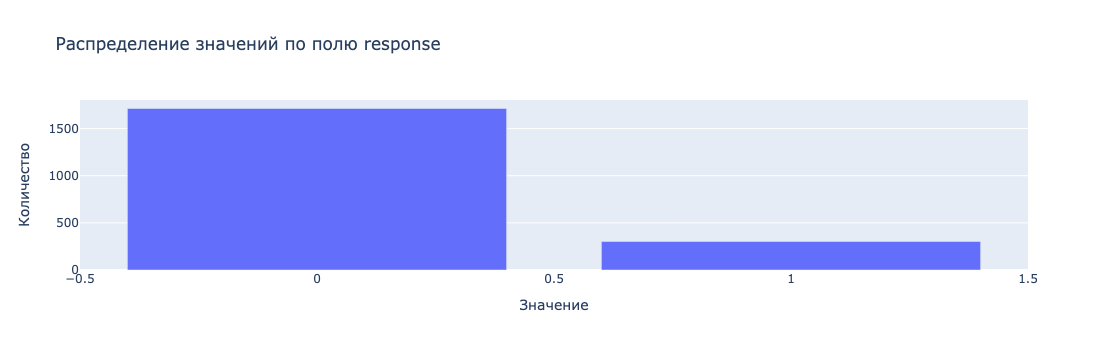

response
Среднее: 0.150
Медиана: 0.000
Min: 0.000
Max: 1.000
Уникальные значения:
response
0    1713
1     302
Name: count, dtype: int64


In [49]:
describe_cat_feature('response')

`response` - категориальный бинарный признак, указывающий принял ли клиент предложение о покупке - целевая переменная на основе которой предстоит предсказывать вероятность совершения покупки. Согласно полученным данным, только 15% клиентов совершили покупку при получении предложения. Также видим, что датасет не сбалансирован по целевой переменной - 85% данных принадлежит к одному классу.

### 3.1.2. Признак `year_birth`

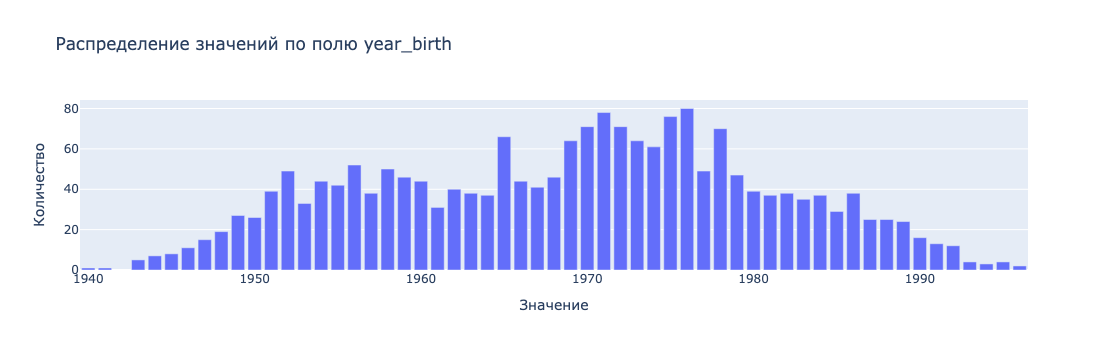

year_birth
Среднее: 1968.890
Медиана: 1970.000
Min: 1940.000
Max: 1996.000
Уникальные значения:
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1996 1995 1943 1941 1940]


In [62]:
describe_cat_feature('year_birth')

`year_birth` - дискретный численный признак, указывающий на год рождения клиента. Самый старший клиент родился в 1946 году, самый младший в 1996 г. Основная часть данных находится в диапозоне 1952-1980 г. На распределении видно два пика - в районе 1956 и 1970 года.

In [45]:

 'education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'dt_customer',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'complain',
 'registration_age',
 'is_parent',
 'mstatus_unified',
 'mnt_total',
 'total_purchases',
 'avg_check'

['year_birth',
 'education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'dt_customer',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'response',
 'complain',
 'registration_age',
 'is_parent',
 'mstatus_unified',
 'mnt_total',
 'total_purchases',
 'avg_check']

### 3.2. Средние значения признаков по группам принявших и не принявших предложение о покупке клиентов

### 3.3. Матрица корреляций признаков

### 3.4. Выводы по исследовательскому анализу данных

## 4. Выбор и обучение модели для определения вероятности покупки товара

## 5. Кластеризация покупателей

## 6. Портрет покупателя

## 7. Общие выводы по результатам работы